In [92]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.ensemble import RandomForestRegressor

from sklearn.cross_validation import cross_val_score, train_test_split

In [93]:
def rmsle(h, y):
    return np.sqrt(np.square(np.log(h + 1) - np.log(y + 1)).mean())

In [94]:
train_data = pd.read_csv('Datasets/train.csv')

test_data = pd.read_csv('Datasets/test.csv')

In [95]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01-01-2011 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,01-01-2011 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,01-01-2011 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,01-01-2011 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,01-01-2011 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [96]:
train_data.shape

(10886, 12)

In [97]:
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,20-01-2011 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,20-01-2011 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,20-01-2011 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,20-01-2011 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,20-01-2011 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [98]:
test_data.shape

(6493, 9)

In [99]:
train_data.isnull().any()

datetime      False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
casual        False
registered    False
count         False
dtype: bool

In [100]:
data = train_data.append(test_data, ignore_index=True)

In [101]:
data.head()

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday
0,14.395,3.0,16.0,01-01-2011 00:00:00,0,81,13.0,1,9.84,1,0.0,0
1,13.635,8.0,40.0,01-01-2011 01:00:00,0,80,32.0,1,9.02,1,0.0,0
2,13.635,5.0,32.0,01-01-2011 02:00:00,0,80,27.0,1,9.02,1,0.0,0
3,14.395,3.0,13.0,01-01-2011 03:00:00,0,75,10.0,1,9.84,1,0.0,0
4,14.395,0.0,1.0,01-01-2011 04:00:00,0,75,1.0,1,9.84,1,0.0,0


In [102]:
data.shape

(17379, 12)

In [103]:
data.isnull().any()

atemp         False
casual         True
count          True
datetime      False
holiday       False
humidity      False
registered     True
season        False
temp          False
weather       False
windspeed     False
workingday    False
dtype: bool

In [104]:
data['registered'].fillna(0, inplace=True)
data['casual'].fillna(0, inplace=True)
data['count'].fillna(0, inplace=True)

In [105]:
data.isnull().any()

atemp         False
casual        False
count         False
datetime      False
holiday       False
humidity      False
registered    False
season        False
temp          False
weather       False
windspeed     False
workingday    False
dtype: bool

In [106]:
data.drop(['count', 'registered', 'casual'], axis=1).describe()

,atemp,holiday,humidity,season,temp,weather,windspeed,workingday
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,23.788755,0.028770,62.722884,2.501640,20.376474,1.425283,12.736540,0.682721
std,8.592511,0.167165,19.292983,1.106918,7.894801,0.639357,8.196795,0.465431
min,0.000000,0.000000,0.000000,1.000000,0.820000,1.000000,0.000000,0.000000
25%,16.665000,0.000000,48.000000,2.000000,13.940000,1.000000,7.001500,0.000000
50%,24.240000,0.000000,63.000000,3.000000,20.500000,1.000000,12.998000,1.000000
75%,31.060000,0.000000,78.000000,3.000000,27.060000,2.000000,16.997900,1.000000
max,50.000000,1.000000,100.000000,4.000000,41.000000,4.000000,56.996900,1.000000


In [107]:
train_data[['count', 'registered', 'casual']].describe()

,count,registered,casual
count,10886.000000,10886.000000,10886.000000
mean,191.574132,155.552177,36.021955
std,181.144454,151.039033,49.960477
min,1.000000,0.000000,0.000000
25%,42.000000,36.000000,4.000000
50%,145.000000,118.000000,17.000000
75%,284.000000,222.000000,49.000000
max,977.000000,886.000000,367.000000


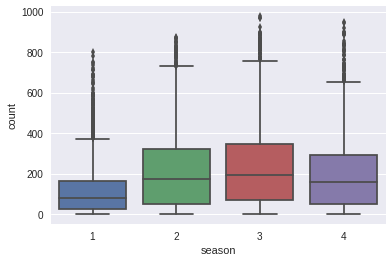

In [108]:
sns.boxplot(y=train_data['count'], x=train_data['season'])

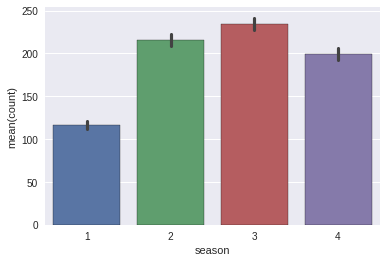

In [109]:
sns.barplot(x=train_data['season'], y=train_data['count'])

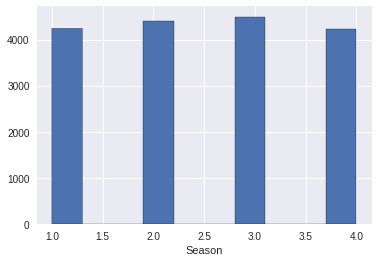

In [110]:
plt.hist('season', data=data)
plt.xlabel('Season')

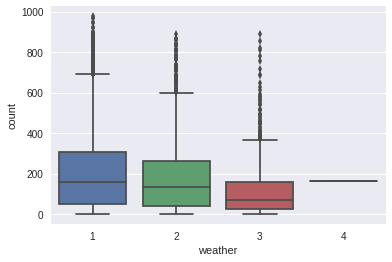

In [111]:
sns.boxplot(y=train_data['count'], x=train_data['weather'])

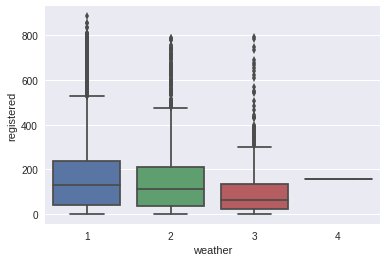

In [112]:
sns.boxplot(y=train_data['registered'], x=train_data['weather'])

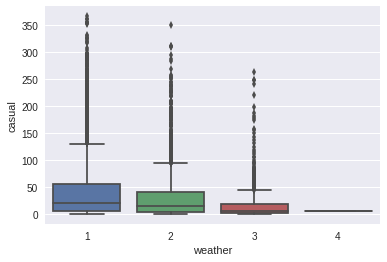

In [113]:
sns.boxplot(y=train_data['casual'], x=train_data['weather'])

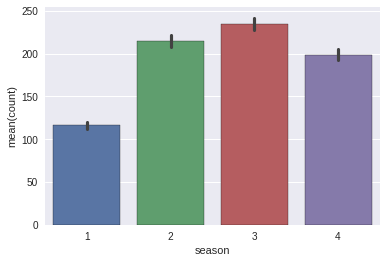

In [114]:
sns.barplot(y=train_data['count'], x=train_data['season'])

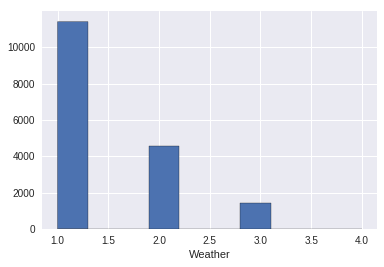

In [115]:
plt.hist('weather', data=data)
plt.xlabel('Weather')

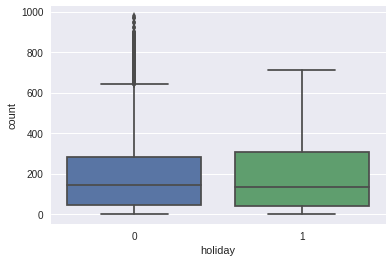

In [116]:
sns.boxplot(y=train_data['count'], x=train_data['holiday'])

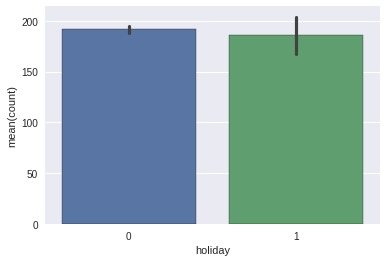

In [117]:
sns.barplot(y=train_data['count'], x=train_data['holiday'])

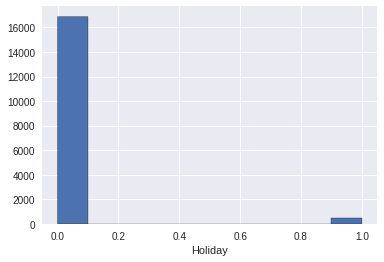

In [118]:
plt.hist('holiday', data=data)
plt.xlabel('Holiday')

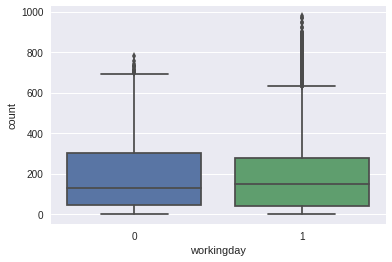

In [119]:
sns.boxplot(y=train_data['count'], x=train_data['workingday'])

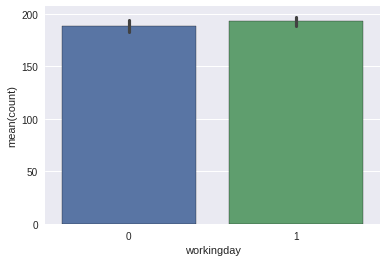

In [120]:
sns.barplot(y=train_data['count'], x=train_data['workingday'])

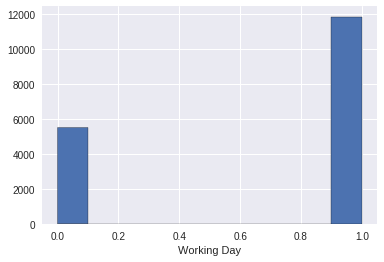

In [121]:
plt.hist('workingday', data=data)
plt.xlabel('Working Day')

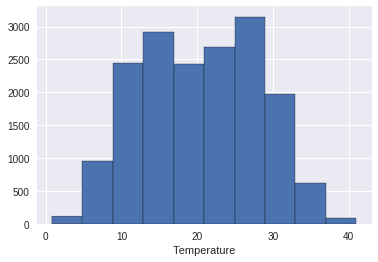

In [122]:
plt.hist('temp', data=data)
plt.xlabel('Temperature')

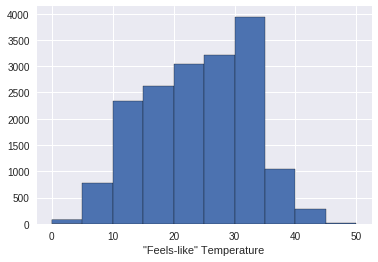

In [123]:
plt.hist('atemp', data=data)
plt.xlabel('"Feels-like" Temperature')

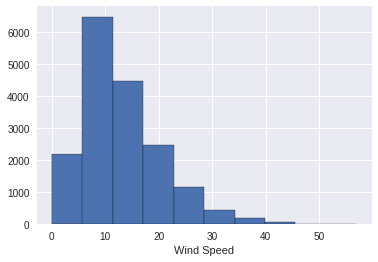

In [124]:
plt.hist('windspeed', data=data)
plt.xlabel('Wind Speed')

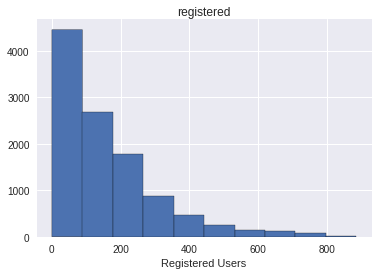

In [125]:
train_data.hist('registered')
plt.xlabel('Registered Users')

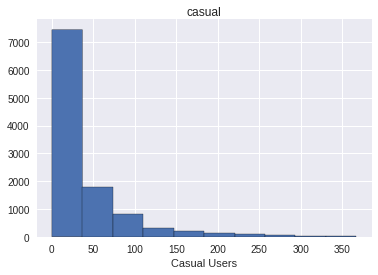

In [126]:
train_data.hist('casual')
plt.xlabel('Casual Users')

In [127]:
def extract_hour(t):
    t = pd.to_datetime(t, format='%d-%m-%Y %H:%M:%S')
    return t.hour

In [128]:
train_data['hour'] = train_data['datetime'].apply(extract_hour)
test_data['hour'] = test_data['datetime'].apply(extract_hour)

In [129]:
registered_per_hour = train_data.groupby('hour')['registered']
casual_per_hour = train_data.groupby('hour')['casual']

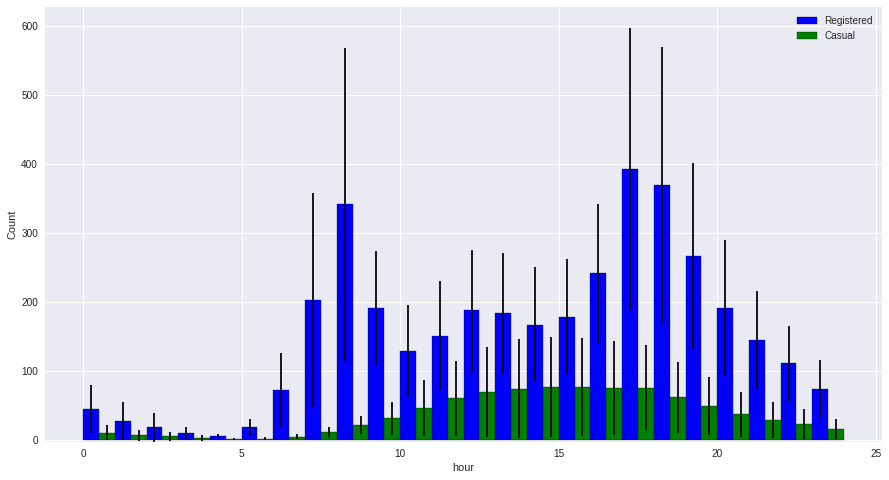

In [130]:
x_loc = np.arange(len(train_data['hour'].unique()))
width = 0.5

fig, ax = plt.subplots()

rects1 = ax.bar(x_loc, np.array(registered_per_hour.mean()), width, color='b', yerr=np.array(registered_per_hour.std()))
rects2 = ax.bar(x_loc+width, np.array(casual_per_hour.mean()), width, color='g', yerr=np.array(casual_per_hour.std()))

ax.set_ylabel('Count')
ax.set_xlabel('hour')

ax.legend((rects1[0], rects2[0]), ('Registered', 'Casual'))

fig.set_figheight(8)
fig.set_figwidth(15)

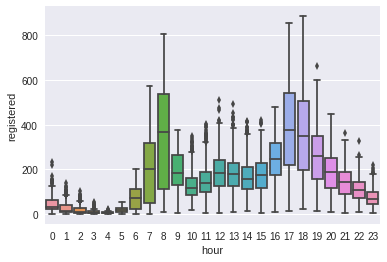

In [131]:
sns.boxplot(y=train_data['registered'], x=train_data['hour'])

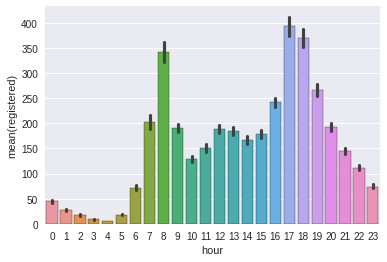

In [132]:
sns.barplot(y=train_data['registered'], x=train_data['hour'])

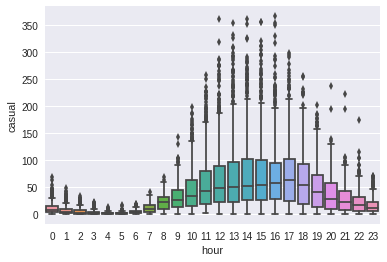

In [133]:
sns.boxplot(y=train_data['casual'], x=train_data['hour'])

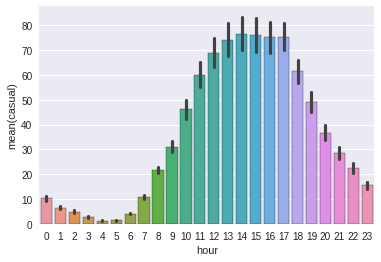

In [134]:
sns.barplot(y=train_data['casual'], x=train_data['hour'])

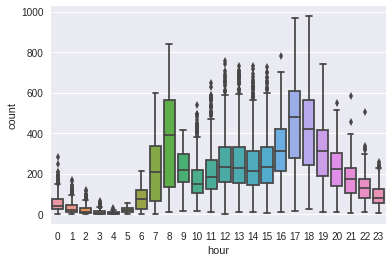

In [135]:
sns.boxplot(y=train_data['count'], x=train_data['hour'])

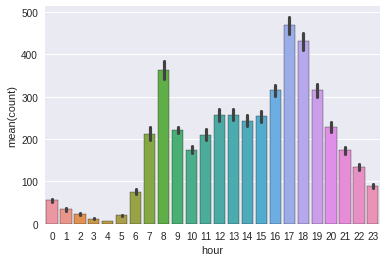

In [136]:
sns.barplot(y=train_data['count'], x=train_data['hour'])

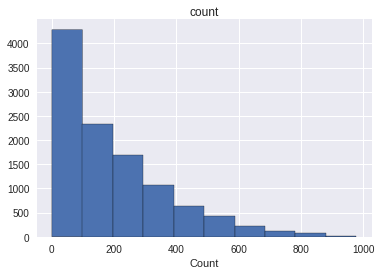

In [137]:
train_data.hist('count')
plt.xlabel('Count')

In [138]:
count_per_hour = train_data.groupby('hour', as_index=False)['count'].mean()
count_per_hour

,hour,count
0,0,55.138462
1,1,33.859031
2,2,22.899554
3,3,11.757506
4,4,6.407240
5,5,19.767699
6,6,76.259341
7,7,213.116484
8,8,362.769231
9,9,221.780220


In [139]:
bins = np.linspace(count_per_hour['count'].min(), count_per_hour['count'].max(), 4)
labels = ['low', 'medium', 'high']
count_buckets, returned_bins = pd.cut(count_per_hour['count'], bins, labels=labels, right=True, include_lowest=True, retbins=True)

count_buckets

0        low
1        low
2        low
3        low
4        low
5        low
6        low
7     medium
8       high
9     medium
10    medium
11    medium
12    medium
13    medium
14    medium
15    medium
16      high
17      high
18      high
19      high
20    medium
21    medium
22       low
23       low
Name: count, dtype: category
Categories (3, object): [low < medium < high]

In [140]:
?pd.cut()

In [141]:
returned_bins

array([   6.40723982,  160.52661017,  314.64598052,  468.76535088])

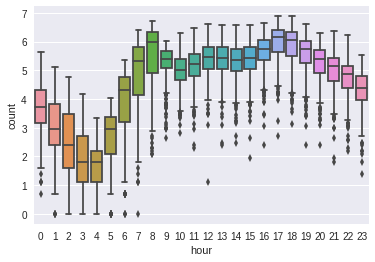

In [142]:
sns.boxplot(y=np.log(train_data['count']), x=train_data['hour'])

In [143]:
def extract_days(t):
    t = pd.to_datetime(t, format='%d-%m-%Y %H:%M:%S')
    return t.weekday()

In [144]:
train_data['day'] = train_data['datetime'].apply(extract_days)
test_data['day'] = test_data['datetime'].apply(extract_days)

In [145]:
train_data['day'].value_counts()

5    1584
6    1579
3    1553
2    1551
0    1551
1    1539
4    1529
Name: day, dtype: int64

In [146]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day
0,01-01-2011 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5
1,01-01-2011 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5
2,01-01-2011 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5
3,01-01-2011 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5
4,01-01-2011 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5


In [147]:
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day
0,20-01-2011 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,3
1,20-01-2011 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,3
2,20-01-2011 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,3
3,20-01-2011 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,3
4,20-01-2011 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,3


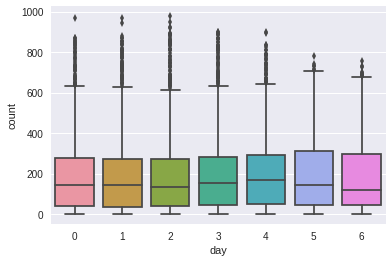

In [148]:
sns.boxplot(y=train_data['count'], x=train_data['day'])

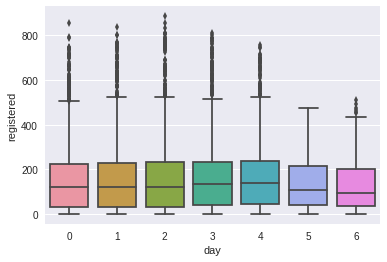

In [149]:
sns.boxplot(y=train_data['registered'], x=train_data['day'])

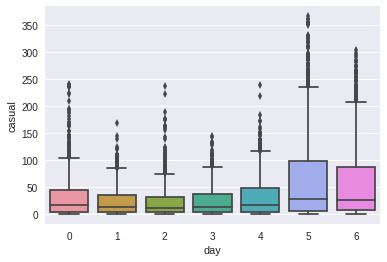

In [150]:
sns.boxplot(y=train_data['casual'], x=train_data['day'])

In [151]:
train_data[['count', 'registered', 'casual', 'temp', 'atemp', 'humidity', 'windspeed']].corr()

,count,registered,casual,temp,atemp,humidity,windspeed
count,1.000000,0.970948,0.690414,0.394454,0.389784,-0.317371,0.101369
registered,0.970948,1.000000,0.497250,0.318571,0.314635,-0.265458,0.091052
casual,0.690414,0.497250,1.000000,0.467097,0.462067,-0.348187,0.092276
temp,0.394454,0.318571,0.467097,1.000000,0.984948,-0.064949,-0.017852
atemp,0.389784,0.314635,0.462067,0.984948,1.000000,-0.043536,-0.057473
humidity,-0.317371,-0.265458,-0.348187,-0.064949,-0.043536,1.000000,-0.318607
windspeed,0.101369,0.091052,0.092276,-0.017852,-0.057473,-0.318607,1.000000


In [152]:
def extract_year(t):
    t = pd.to_datetime(t, format='%d-%m-%Y %H:%M:%S')
    return t.year

In [153]:
train_data['year'] = train_data['datetime'].apply(extract_year)
test_data['year'] = test_data['datetime'].apply(extract_year)

In [154]:
train_data['year'].value_counts()

2012    5464
2011    5422
Name: year, dtype: int64

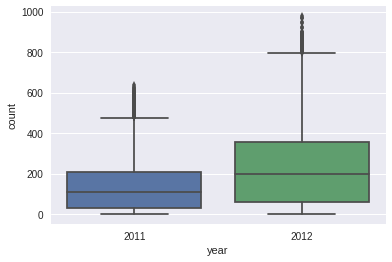

In [155]:
sns.boxplot(y=train_data['count'], x=train_data['year'])

In [156]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,year
0,01-01-2011 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,2011
1,01-01-2011 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,2011
2,01-01-2011 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,2011
3,01-01-2011 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5,2011
4,01-01-2011 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5,2011


In [157]:
test_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,day,year
0,20-01-2011 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,3,2011
1,20-01-2011 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,3,2011
2,20-01-2011 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,3,2011
3,20-01-2011 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,3,2011
4,20-01-2011 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,3,2011


In [158]:
def is_weekend(data):
    if data['day'] == 5 or data['day'] == 6:
        data['weekend'] = 1
    return data

In [159]:
train_data['weekend'] = 0
test_data['weekend'] = 0
train_data[(train_data['day'] == 5) | (train_data['day'] == 6)]['weekend'] = 1
test_data[(test_data['day'] == 5) | (test_data['day'] == 6)]['weekend'] = 1

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [160]:
train_data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,year,weekend
0,01-01-2011 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,2011,0
1,01-01-2011 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,2011,0
2,01-01-2011 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,2011,0
3,01-01-2011 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5,2011,0
4,01-01-2011 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5,2011,0
